# HW2 - Feature Engineering (FE) & EDA Assignment
* __Zhenyu Wang__
* __UNI: zw2847__

# Table of Contents
- [Section 1: Data Preparation](#section-1-data-preparation)
- [Section 2: Initial Observations](#section-2-initial-observations)
- [Section 3: Feature Engineering](#section-3-feature-engineering)
  - [Feature 1: Transaction Count by Cardholder](#feature-1)
  - [Feature 2: Transaction Amount Categories](#feature-2)
  - [Feature 3: Transaction Frequency by Day of the Week](#feature-3)
  - [Feature 4: Transaction Amount per Vendor](#feature-4)
  - [Feature 5: Transaction Vendor Popularity](#feature-5)
  - [Feature 6: Transaction Amount per Merchant Category](#feature-6)
  - [Feature 7: Transaction Amount vs. Transaction Count Ratio](#feature-7)
  - [Feature 8: Transaction Amount vs. Vendor Popularity Ratio](#feature-8)
  - [Feature 9: Transaction Amount vs. Merchant Category Ratio](#feature-9)
  - [Feature 10: Transaction Frequency by Month](#feature-10)
  - [Feature 11: Transaction Amount vs. Month Ratio](#feature-11)
  - [Feature 12: Transaction Amount vs. Day of the Week Ratio](#feature-12)
  - [Feature 13: Transaction Amount vs. Year Ratio](#feature-13)
  - [Feature 14: Transaction Amount vs. Transaction Type Ratio](#feature-14)
  - [Feature 15: Transaction Amount vs. Merchant Category Median Ratio](#feature-15)
  
## Section 1: Data Preparation <a class="anchor" id="section-1-data-preparation"></a>

> Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Load the dataset

In [2]:
df = pd.read_csv('purchase_credit_card.csv')
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


> Display basic information about the dataset

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB
None


> Summary statistics
- Dataset shape is 442358 x 11, and print the column name

In [4]:
print("Summary Statistics:")
print(df.shape)
print(df.columns)
print(df.describe()) 

Summary Statistics:
(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')
          Year-Month  Agency Number        Amount
count  442458.000000  442458.000000  4.424580e+05
mean   201357.284375   42785.860353  4.249912e+02
std        47.107417   33378.461293  5.266509e+03
min    201307.000000    1000.000000 -4.286304e+04
25%    201309.000000    1000.000000  3.091000e+01
50%    201401.000000   47700.000000  1.048900e+02
75%    201404.000000   76000.000000  3.450000e+02
max    201406.000000   98000.000000  1.903858e+06


> Check for missing values 

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Year-Month                      0
Agency Number                   0
Agency Name                     0
Cardholder Last Name            0
Cardholder First Initial        0
Description                     0
Amount                          0
Vendor                          0
Transaction Date                0
Posted Date                     0
Merchant Category Code (MCC)    0
dtype: int64


> Change column names

In [6]:
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name', 'Cardholder_First_Initial', 
              'Description', 'Amount', 'Vendor', 'Transaction_Date', 'Posted_Date', 'Merchant_Category']

> Create date fields
- Creating separate Year and Month columns for future feature engineering
- Converting Transaction_Date and Posted_date from Python Object data type to datetime

In [7]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

- Transaction Amount per Merchant Category: Calculate the average transaction amount for each merchant category.

In [8]:
category_avg_amount = df.groupby('Merchant_Category')['Amount'].mean().reset_index()
category_avg_amount.columns = ['Merchant_Category', 'Avg_Transaction_Amount_Merchant_Category']
df = pd.merge(df, category_avg_amount, on='Merchant_Category', how='left')

- Transaction Amount per Vendor: Calculate the average transaction amount for each vendor.

In [9]:
vendor_avg_amount = df.groupby('Vendor')['Amount'].mean().reset_index()
vendor_avg_amount.columns = ['Vendor', 'Avg_Transaction_Amount_Vendor']
df = pd.merge(df, vendor_avg_amount, on='Vendor', how='left')

- Transaction Vendor Popularity: Calculate the popularity of each vendor by counting the number of transactions with that vendor. 

In [10]:
vendor_popularity = df['Vendor'].value_counts().reset_index()
vendor_popularity.columns = ['Vendor', 'Transaction_Count_Vendor']
df = pd.merge(df, vendor_popularity, on='Vendor', how='left')

- Transaction Frequency: Count the number of transactions for each cardholder to understand their transaction behavior.

In [11]:
cardholder_transaction_counts = df['Cardholder_Last_Name'].value_counts().reset_index()
cardholder_transaction_counts.columns = ['Cardholder_Last_Name', 'Transaction_Count_Cardholder']
df = pd.merge(df, cardholder_transaction_counts, on='Cardholder_Last_Name', how='left')

- Transaction Amount Categories: Create categories for transaction amounts, such as "Low," "Medium," and "High," based on ranges below.
- low: < 100 dollars
- medium: 100 <= and < 500 dollars
- high: >= 500 dollars

In [12]:
def categorize_amount(amount):
    if amount < 100:
        return 'Low'
    elif 100 <= amount < 500:
        return 'Medium'
    else:
        return 'High'

df['Transaction_Amount_Category'] = df['Amount'].apply(categorize_amount)

## Section 2: Initial Observations <a class="anchor" id="section-2-initial-observations"></a>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

> Average Transaction Amount per Vendor:
- This bar plot displays the average transaction amount for the top 10 vendors. From the chart, we can see that "NACAS" ranks 1st in terms of the highest average transaction amount, followed by "Kyocera Document Solutions" which is ranked 2nd. "Sheraton Hotel" takes the third position. And is valuable for quickly identifying the top 10 vendors with the highest average transaction amounts. It provides insights into which vendors tend to have larger transactions, which can be essential for vendor performance analysis and decision-making.

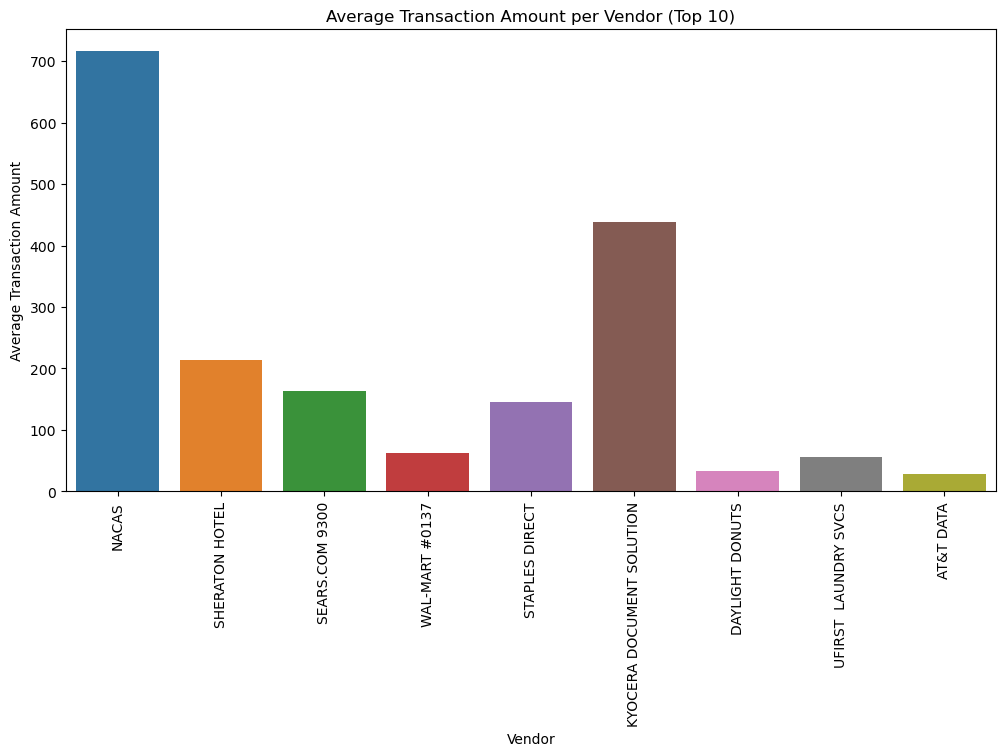

In [14]:
# Create a bar plot to visualize average transaction amount per vendor
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor', y='Avg_Transaction_Amount_Vendor', data=df.head(10))
plt.xticks(rotation=90)
plt.title('Average Transaction Amount per Vendor (Top 10)')
plt.xlabel('Vendor')
plt.ylabel('Average Transaction Amount')
plt.show()

>  Transaction Vendor Popularity:
- This bar plot provides a visual representation of the transaction count for the top 10 vendors, giving insights into their popularity among cardholders. According to the chart, "AT&T Data" is the most popular vendor, ranking 1st in terms of the highest transaction count. "Walmart" takes the 2nd position, and "Staples Direct" is ranked 3rd. By examining this chart, we can quickly identify the top 10 vendors with the highest transaction counts, which is valuable for understanding cardholder spending patterns and vendor preferences.

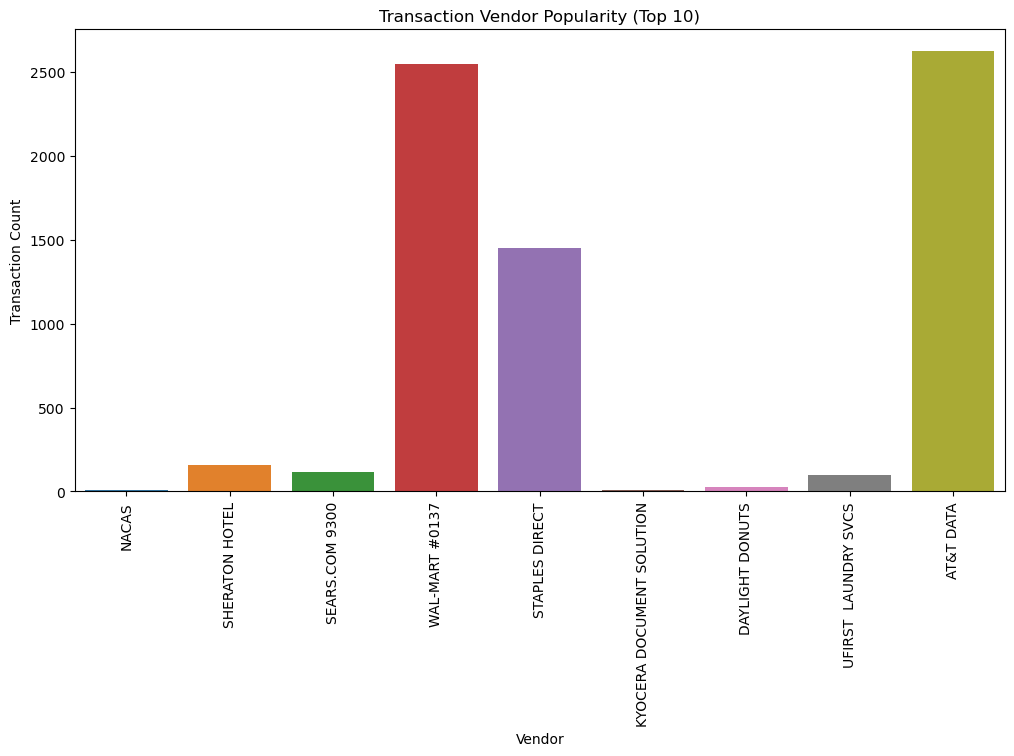

In [15]:
# Create a bar plot to visualize transaction count per vendor (top 10 vendors)
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor', y='Transaction_Count_Vendor', data=df.head(10))
plt.xticks(rotation=90)
plt.title('Transaction Vendor Popularity (Top 10)')
plt.xlabel('Vendor')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount Categories:
- This count plot effectively visualizes the distribution of transaction amount categories, namely "Low", "Medium" and "High". "Low" includes transactions with relatively small amounts (less than 100), often comprising everyday expenses. "Medium" encompasses moderately-sized transactions (from 100 to 500). "High" consists of larger transactions (500 or more). It provides valuable insights into the frequency of transactions within each category. From the chart, we can observe that the majority of transactions fall into the "Low" category, comprising nearly half of all transactions. The "Medium" category follows, indicating a moderate frequency of transactions. In contrast, the "High" category represents the least frequent transactions, with a count of less than 100,000.

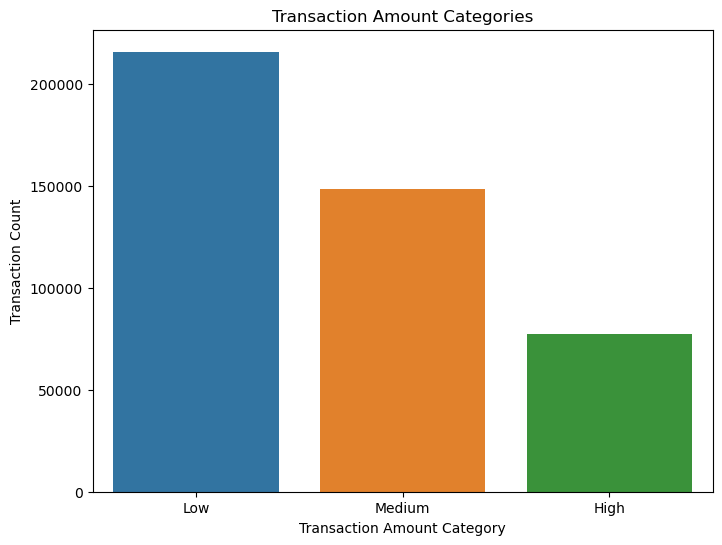

In [16]:
# Create a count plot to visualize the distribution of transaction amount categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Transaction_Amount_Category', data=df, order=['Low', 'Medium', 'High'])
plt.title('Transaction Amount Categories')
plt.xlabel('Transaction Amount Category')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount by Day of the Week:
- This box plot illustrates the distribution of transaction amounts for each day of the week. The x-axis represents the days of the week, while the y-axis represents transaction amounts. This plot is particularly useful for identifying any anomalies or unusual patterns in spending behavior based on the day of the week. By analyzing the spread and central tendency of transaction amounts across different days, we can detected potential outliers in WED, THUR, FRI, which have a few large amount spending Occured.

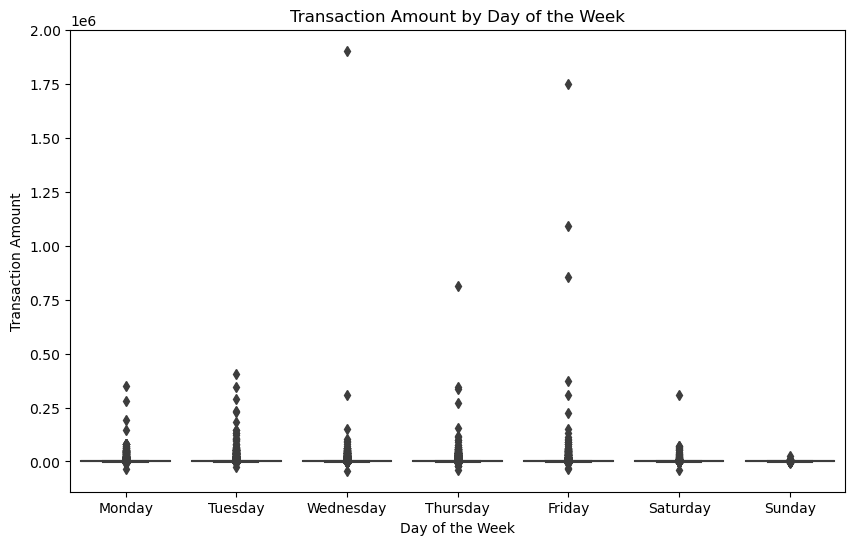

In [17]:
# Create a box plot to visualize transaction amounts by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Amount', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Amount')
plt.show()

> Transaction Frequency by Month:
- This count plot displays the transaction frequency for each month, providing insights into how the number of transactions varies throughout the year. By examining the distribution of transaction counts across months, we can identify the patterns in spending behavior. Which can better help us finding the anomalies.

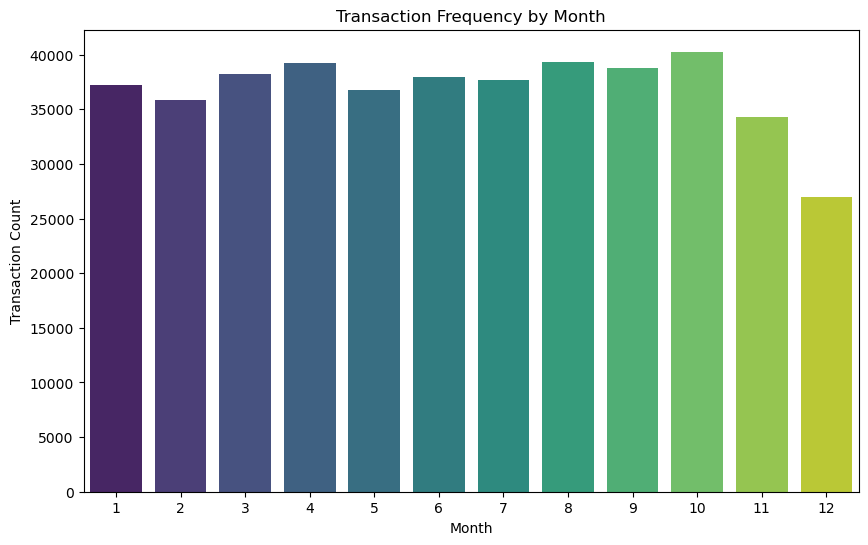

In [18]:
# Create a count plot to visualize transaction frequency by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Transaction Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount by Agency:
- This bar plot displays the total transaction amount for the top 10 agencies. It helps us identify which agencies have the highest total spending.

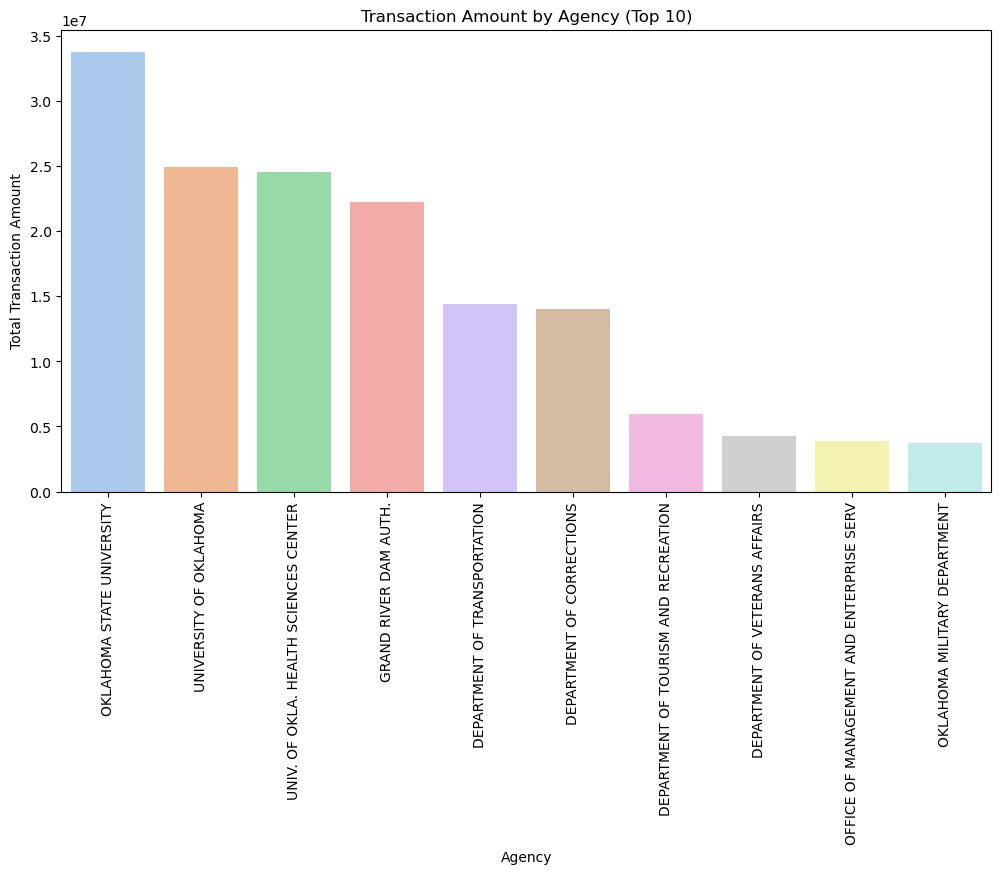

In [19]:
# Create a bar plot to visualize transaction amounts by agency (top 10 agencies)
plt.figure(figsize=(12, 6))
sns.barplot(x='Agency_Name', y='Amount', data=df.groupby('Agency_Name')['Amount'].sum().reset_index().nlargest(10, 'Amount'), palette='pastel')
plt.title('Transaction Amount by Agency (Top 10)')
plt.xlabel('Agency')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()

> Transaction Amount by Merchant Category:
- This bar plot presents the total transaction amount for the top 10 merchant categories, helping us identify which categories account for the highest spending.

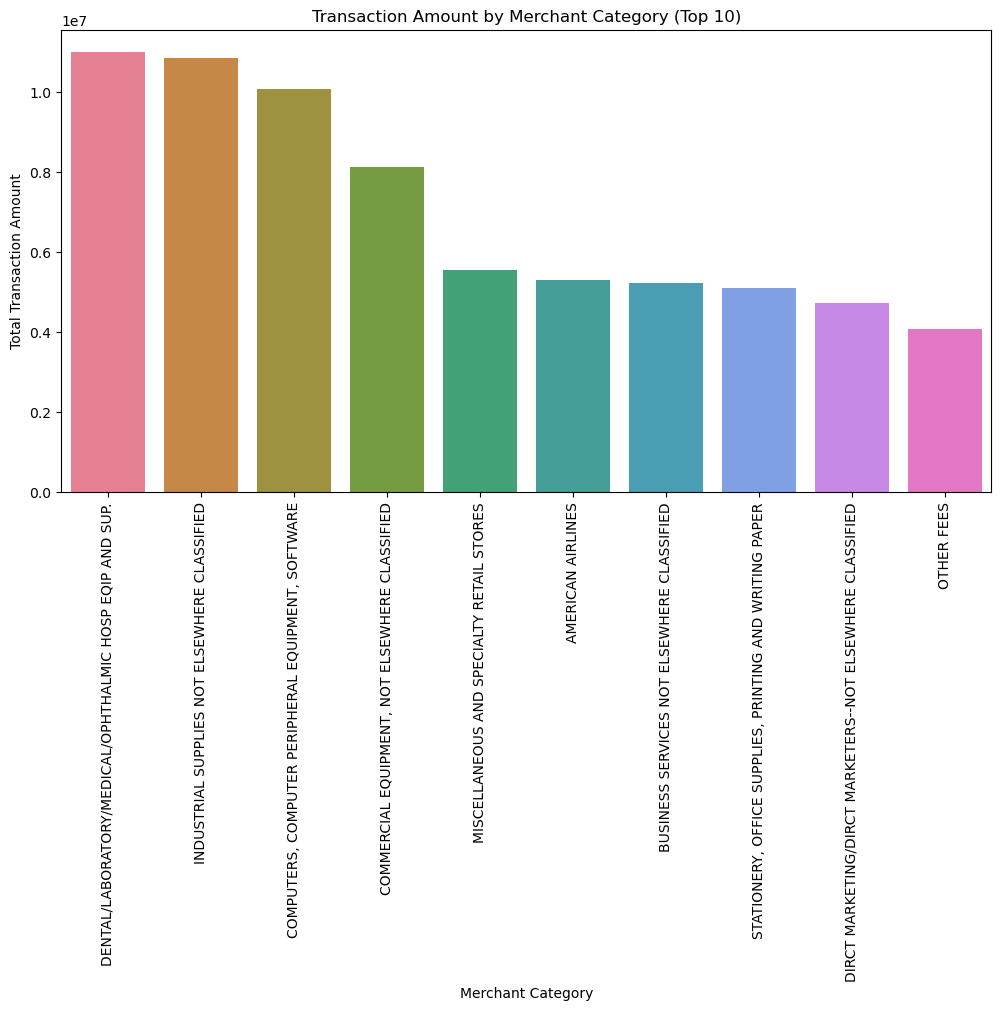

In [20]:
# Create a bar plot to visualize transaction amounts by merchant category (top 10 categories)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant_Category', y='Amount', data=df.groupby('Merchant_Category')['Amount'].sum().reset_index().nlargest(10, 'Amount'), palette='husl')
plt.title('Transaction Amount by Merchant Category (Top 10)')
plt.xlabel('Merchant Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()


> Transaction Amount vs. Day of the Week and Transaction Amount Category:
- This grouped bar plot allows to compare transaction amounts by day of the week while distinguishing between different transaction amount categories (Low, Medium, High).

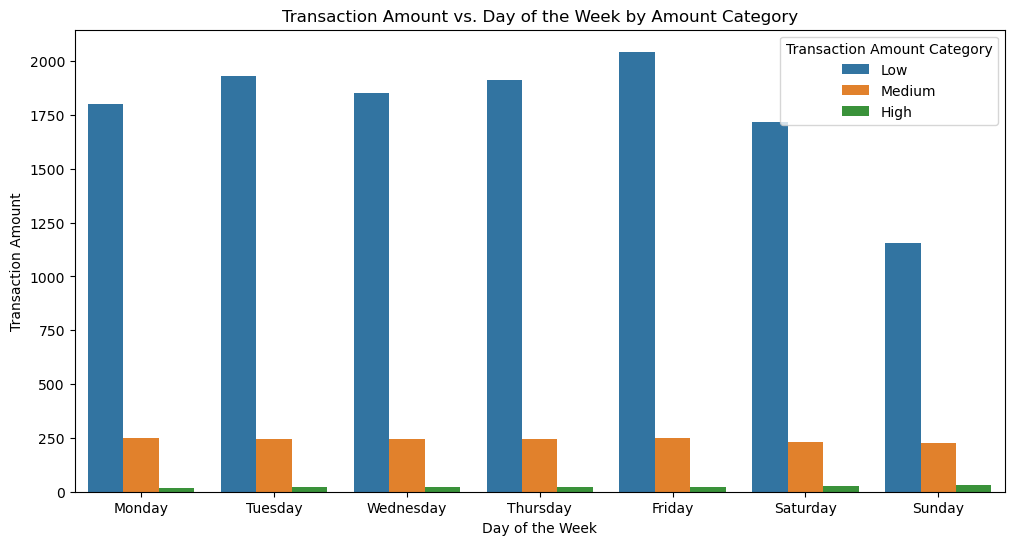

In [21]:
# Create a grouped bar plot to compare transaction amounts by day of the week and transaction amount category
plt.figure(figsize=(12, 6))
sns.barplot(x='Day_of_Week', y='Amount', hue='Transaction_Amount_Category', data=df, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Amount vs. Day of the Week by Amount Category')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Amount Category', loc='upper right', labels=['Low', 'Medium', 'High'])
plt.show()

> Transaction Frequency by Month:
- This line plot displays the transaction frequency over time, specifically by month. 

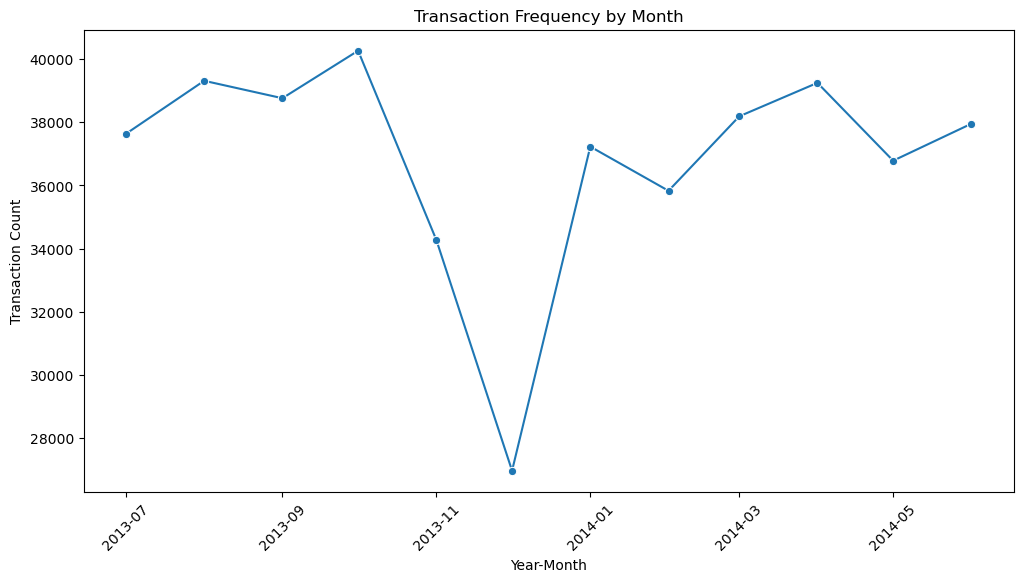

In [22]:
# Create a line plot to visualize transaction frequency by month
monthly_transaction_counts = df.groupby('Year_Month')['Amount'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Amount', data=monthly_transaction_counts, marker='o', palette='pastel')
plt.title('Transaction Frequency by Month')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

## Section 3: Feature Engineering <a class="anchor" id="section-3-feature-engineering"></a>

> __Feature 1<a class="anchor" id="feature-1"></a>:__ Transaction Count by Cardholder - `Transaction_Count_Cardholder`
- This feature quantifies how frequently each cardholder conducts transactions. By comparing an individual cardholder's transaction count to the average count for all cardholders, we can identify those whose transaction behavior significantly differs from the norm. Deviations may signal potential anomalies, such as a sudden spike in transactions by a single cardholder, potentially indicative of fraudulent activity.

In [23]:
cardholder_transaction_counts = df['Cardholder_Last_Name'].value_counts().reset_index()
cardholder_transaction_counts.columns = ['Cardholder_Last_Name', 'Transaction_Count_Cardholder']

> __Feature 2<a class="anchor" id="feature-2"></a>:__ Transaction Amount Categories: `Transaction_Amount_Category`
- Categorizing transactions into "Low," "Medium," and "High" based on predefined thresholds provides an overview of transaction patterns. Comparing the distribution of these categories to established benchmarks enables us to detect shifts in spending behavior. For instance, an unexpected surge in "High" transactions could be a red flag, prompting further investigation.

In [24]:
def categorize_amount(amount):
    if amount < 100:
        return 'Low'
    elif 100 <= amount < 500:
        return 'Medium'
    else:
        return 'High'

In [25]:
df['Transaction_Amount_Category'].value_counts()

Low       216011
Medium    148850
High       77597
Name: Transaction_Amount_Category, dtype: int64

> __Feature 3<a class="anchor" id="feature-3"></a>:__ Transaction Frequency by Day of the Week: `Day_of_Week`
- Analyzing transaction frequency patterns across days of the week helps identify unusual trends. Comparing daily transaction frequencies to benchmarks highlights days with atypical transaction behavior. Anomalies might include sudden spikes or drops in transactions on specific days, potentially indicating irregularities such as fraud or system glitches.

In [26]:
day_of_week_transaction_counts = df.groupby('Day_of_Week')['Transaction_Date'].count().reset_index()
day_of_week_transaction_counts.columns = ['Day_of_Week', 'Avg_Transaction_Count_Day_of_Week']
df['Day_of_Week']

0          Tuesday
1          Tuesday
2           Monday
3          Tuesday
4          Tuesday
            ...   
442453      Friday
442454      Friday
442455      Friday
442456    Thursday
442457      Friday
Name: Day_of_Week, Length: 442458, dtype: object

> __Feature 4<a class="anchor" id="feature-4"></a>:__ Transaction Amount per Vendor: `Avg_Transaction_Amount_Vendor`
- Explanation: Calculating the average transaction amount for each vendor allows us to assess vendor-specific spending behavior. By comparing these averages to the overall average transaction amount, we can pinpoint vendors with transactions deviating significantly from the norm. Unusually high or low averages may suggest anomalies, like overcharging or discounts.

In [27]:
vendor_avg_amount = df.groupby('Vendor')['Amount'].mean().reset_index()
vendor_avg_amount.columns = ['Vendor', 'Avg_Transaction_Amount_Vendor']
df["Avg_Transaction_Amount_Vendor"]

0          715.555556
1          214.383270
2          163.750339
3           62.405600
4          144.875697
             ...     
442453    5460.217273
442454    1307.045455
442455     247.244264
442456    1830.477778
442457    7521.371220
Name: Avg_Transaction_Amount_Vendor, Length: 442458, dtype: float64

> __Feature 5<a class="anchor" id="feature-5"></a>:__ Transaction Vendor Popularity: `Transaction_Count_Vendor`
- This feature quantifies the popularity of each vendor based on transaction counts. Comparing vendor transaction counts to benchmarks helps identify vendors that are unusually popular or unpopular. Anomalies may arise from vendors with transaction counts significantly different from the expected, such as a sudden surge in transactions with an obscure vendor, potentially warranting investigation.

In [28]:
vendor_popularity = df['Vendor'].value_counts().reset_index()
vendor_popularity.columns = ['Vendor', 'Transaction_Count_Vendor']
df['Transaction_Count_Vendor']

0            9
1          159
2          118
3         2548
4         1450
          ... 
442453      11
442454      44
442455     258
442456      27
442457      41
Name: Transaction_Count_Vendor, Length: 442458, dtype: int64

> __Feature 6<a class="anchor" id="feature-6"></a>:__ Transaction Amount per Merchant Category: `Avg_Transaction_Amount_Merchant_Category`
- Assessing average transaction amounts within merchant categories reveals spending patterns. By comparing these averages to the overall average, we can identify categories with transactions deviating significantly from the norm. Unexpectedly high spending in a particular category may be indicative of anomalies, such as unusual expenses or targeted spending.

In [29]:
category_avg_amount = df.groupby('Merchant_Category')['Amount'].mean().reset_index()
category_avg_amount.columns = ['Merchant_Category', 'Avg_Transaction_Amount_Merchant_Category']
df['Avg_Transaction_Amount_Merchant_Category']

0         480.051482
1         389.172289
2         676.519181
3          74.121967
4         204.915215
             ...    
442453    725.072467
442454    633.644908
442455    514.318754
442456    647.994093
442457    417.178636
Name: Avg_Transaction_Amount_Merchant_Category, Length: 442458, dtype: float64

> __Feature 7<a class="anchor" id="feature-7"></a>:__ Transaction Amount vs. Transaction Count Ratio: `Transaction_Amount_to_Count_Ratio`
- This ratio examines how transaction amount correlates with transaction count. By comparing the distribution of these ratios to benchmarks for different groups of individuals, we can identify unusual patterns. For instance, a high spending per transaction ratio for infrequent shoppers may suggest anomalies, like luxury purchases by typically low-spending individuals.

In [30]:
df['Transaction_Amount_to_Count_Ratio'] = df['Amount'] / df['Transaction_Count_Cardholder']
df['Transaction_Amount_to_Count_Ratio'].describe()

count    442458.000000
mean          4.790390
std         698.791181
min        -745.357143
25%           0.080901
50%           0.350977
75%           1.384149
max      317309.728333
Name: Transaction_Amount_to_Count_Ratio, dtype: float64

> __Feature 8<a class="anchor" id="feature-8"></a>:__ Transaction Amount vs. Vendor Popularity Ratio: `Transaction_Amount_to_Vendor_Ratio`
- Calculating the ratio of transaction amount to vendor popularity allows us to assess spending behavior relative to vendor popularity. Comparing this ratio to benchmarks highlights vendors with ratios significantly higher or lower than expected. Anomalies might include high ratios with unpopular vendors, possibly indicating irregular spending.

In [31]:
df['Transaction_Amount_to_Vendor_Ratio'] = df['Amount'] / df['Transaction_Count_Vendor']
df['Transaction_Amount_to_Vendor_Ratio'].describe()

count    442458.000000
mean         82.605180
std        1372.810293
min      -11369.333333
25%           0.058446
50%           1.257588
75%          20.000000
max      544590.000000
Name: Transaction_Amount_to_Vendor_Ratio, dtype: float64

> __Feature 9<a class="anchor" id="feature-9"></a>:__ Transaction Amount vs. Merchant Category Ratio: `Transaction_Amount_to_Category_Ratio`
- This ratio assesses how transaction amount correlates with merchant category. Comparing the distribution of these ratios to benchmarks for different merchant categories enables us to detect deviations from the expected. Unusually high ratios within specific categories may suggest anomalies, like targeted spending in a particular area.

In [32]:
df['Transaction_Amount_to_Category_Ratio'] = df['Amount'] / df['Avg_Transaction_Amount_Merchant_Category']
df['Transaction_Amount_to_Category_Ratio'].describe()

count    4.424580e+05
mean              NaN
std               NaN
min              -inf
25%      1.330033e-01
50%      4.023802e-01
75%      9.423533e-01
max               inf
Name: Transaction_Amount_to_Category_Ratio, dtype: float64

> __Feature 10<a class="anchor" id="feature-10"></a>:__ Transaction Frequency by Month: `Avg_Transaction_Count_Month`
- This feature calculates the number of transactions for each month. It helps identify seasonal or monthly trends in transaction frequency. Anomalies may be detected when there are significant deviations from the expected number of transactions for a particular month. For example, a sudden spike in transactions during an atypical month could be considered an anomaly.

In [33]:
monthly_transaction_counts = df.groupby('Month')['Transaction_Date'].count().reset_index()
monthly_transaction_counts.columns = ['Month', 'Avg_Transaction_Count_Month']
df = pd.merge(df, monthly_transaction_counts, on='Month', how='left')

> __Feature 11<a class="anchor" id="feature-11"></a>:__ Transaction Amount vs. Month Ratio: `Transaction_Amount_to_Month_Ratio`
- This ratio compares transaction amounts for each month to the overall average transaction amount. It allows you to assess whether transaction amounts in a specific month significantly differ from the average. Anomalies may occur when the ratio deviates substantially from the expected value. For instance, if transaction amounts are consistently much higher in a particular month compared to the average, it could be flagged as an anomaly.

In [34]:
df['Transaction_Amount_to_Month_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Month']
df['Transaction_Amount_to_Month_Ratio'].describe()

count    442458.000000
mean          0.011511
std           0.136771
min          -1.122422
25%           0.000844
50%           0.002845
75%           0.009300
max          49.116619
Name: Transaction_Amount_to_Month_Ratio, dtype: float64

> __Feature 12<a class="anchor" id="feature-12"></a>:__ Transaction Amount vs. Day of the Week Ratio: `Transaction_Amount_to_Day_Ratio`
- This ratio evaluates how transaction amounts vary by day of the week. It helps in identifying spending patterns based on weekdays. Anomalies can be identified when the ratio of transaction amounts for a specific day of the week differs significantly from the expected ratio. For example, if Fridays typically have higher transaction amounts, but one Friday's ratio is much lower, it could indicate an anomaly. 

In [35]:
day_of_week_transaction_counts = df.groupby('Day_of_Week')['Transaction_Date'].count().reset_index()
day_of_week_transaction_counts.columns = ['Day_of_Week', 'Avg_Transaction_Count_Day_of_Week']
df = pd.merge(df, day_of_week_transaction_counts, on='Day_of_Week', how='left')
df['Transaction_Amount_to_Day_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Day_of_Week']
df['Transaction_Amount_to_Day_Ratio'].describe() 

count    442458.000000
mean          0.006128
std           0.067325
min          -1.463750
25%           0.000422
50%           0.001458
75%           0.004775
max          21.902474
Name: Transaction_Amount_to_Day_Ratio, dtype: float64

> __Feature 13<a class="anchor" id="feature-13"></a>:__ Transaction Amount vs. Year Ratio: `Transaction_Amount_to_Year_Ratio`
- This ratio examines transaction amounts relative to the year of the transaction. It allows you to spot year-specific spending trends. Anomalies may be detected when the ratio deviates significantly from the expected value for a particular year. For instance, if transaction amounts in a specific year are consistently much higher or lower than the average, it could indicate an anomaly.

In [36]:
year_transaction_counts = df.groupby('Year')['Transaction_Date'].count().reset_index()
year_transaction_counts.columns = ['Year', 'Avg_Transaction_Count_Year']
df = pd.merge(df, year_transaction_counts, on='Year', how='left')
df['Transaction_Amount_to_Year_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Year']
df['Transaction_Amount_to_Year_Ratio'].describe()

count    442458.000000
mean          0.001921
std           0.024080
min          -0.190302
25%           0.000140
50%           0.000473
75%           0.001554
max           8.764615
Name: Transaction_Amount_to_Year_Ratio, dtype: float64

> __Feature 14<a class="anchor" id="feature-14"></a>:__ Transaction Amount vs. Transaction Type Ratio: `Transaction_Amount_vs_Transaction_Type_Ratio`
-  This ratio analyzes how transaction amounts vary based on different transaction types. It assesses whether specific types of transactions, such as online purchases, in-person transactions, or cash advances, have significantly different average transaction amounts. Anomalies can be identified if certain transaction types consistently deviate from the expected transaction amount. For example, if online purchases tend to have unusually high transaction amounts, it could raise concerns.

In [37]:
# Calculate the average transaction amount for each transaction type
type_avg_amount = df.groupby('Description')['Amount'].mean().reset_index()
type_avg_amount.columns = ['Description', 'Avg_Transaction_Amount_Type']

# Merge the average transaction amount by type with the original dataframe
df = pd.merge(df, type_avg_amount, on='Description', how='left')

# Create the 'Transaction_Amount_vs_Transaction_Type_Ratio' feature
df['Transaction_Amount_vs_Transaction_Type_Ratio'] = df['Amount'] / df['Avg_Transaction_Amount_Type']
df['Transaction_Amount_vs_Transaction_Type_Ratio']

0          1.846395
1          1.067265
2          0.344010
3          0.199971
4          0.996235
            ...    
442453     2.058004
442454     5.010161
442455     0.368242
442456    67.335323
442457     9.779814
Name: Transaction_Amount_vs_Transaction_Type_Ratio, Length: 442458, dtype: float64

> __Feature 15<a class="anchor" id="feature-15"></a>:__ Transaction Amount vs. Merchant Category Median Ratio:`Transaction_Amount_vs_Merchant_Median_Ratio`
- This ratio examines the relationship between transaction amounts and the merchant category using the median transaction amount. It calculates the median transaction amount for each unique merchant category and compares it to the overall median transaction amount. Deviations from the median ratio can highlight specific merchant categories with unusually high or low transaction amounts compared to the overall median. Detecting such anomalies can help identify merchant categories that may have atypical transaction patterns, potentially indicating fraud or irregular spending behavior.

- Utilizing the median as the central measure makes this feature robust to outliers, as it is less affected by extreme values. This robustness is particularly valuable for anomaly detection, as extreme values in transaction amounts can skew the results and lead to false positives.

In [38]:
# Calculate the median transaction amount for each unique merchant category
median_amount_per_category = df.groupby('Merchant_Category')['Amount'].median().reset_index()
median_amount_per_category.columns = ['Merchant_Category', 'Median_Amount_Merchant_Category']

# Calculate the overall median transaction amount
overall_median_amount = df['Amount'].median()

# Create the 'Transaction_Amount_vs_Merchant_Median_Ratio' feature
df = pd.merge(df, median_amount_per_category, on='Merchant_Category', how='left')
df['Transaction_Amount_vs_Merchant_Median_Ratio'] = df['Amount'] / df['Median_Amount_Merchant_Category'] * 100

# Drop the intermediate 'Median_Amount_Merchant_Category' column
df.drop(columns=['Median_Amount_Merchant_Category'], inplace=True)

df['Transaction_Amount_vs_Merchant_Median_Ratio']

0           356.000000
1           147.998396
2            78.856762
3           262.214363
4           184.152047
              ...     
442453      519.290164
442454     1656.037852
442455      115.259740
442456    12982.800000
442457     4770.360251
Name: Transaction_Amount_vs_Merchant_Median_Ratio, Length: 442458, dtype: float64